#                     HR Analytics Employee Attrition & Performance

The data set is taken from Kaggle website. 

In [1]:
# Import the neccessary modules for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [2]:
#Read the csv file and store our dataset into a dataframe called "df"
df = pd.DataFrame.from_csv('C:/Users/anuka/Documents/ALT/HR_Analytics.csv', index_col=None)

In [3]:
# Check to see if there are any missing values in our data set
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [4]:
# Get an overview of our dataset
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
# Renaming certain columns for better readability
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

In [6]:
# Moved the reponse variable "turnover" to the front of the table
front = df['turnover']
df.drop(labels=['turnover'], axis=1,inplace = True)
df.insert(0, 'turnover', front)
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


## Statistical Overview of the data

In [7]:
# To check the number of observations
df.shape

(14999, 10)

In [8]:
# Check the type of features
df.dtypes

turnover                 int64
satisfaction           float64
evaluation             float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
promotion                int64
department              object
salary                  object
dtype: object

In [9]:
# To check the turnover ratio
turnover_rate = df.turnover.value_counts() / len(df)
turnover_rate

0    0.761917
1    0.238083
Name: turnover, dtype: float64

Looks like about 76% of employees stayed and 24% of employees left.

In [10]:
# Display the statistical overview of the employees
df.describe()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [11]:
# Overview of summary (Turnover V.S. Non-turnover)
turnover_Summary = df.groupby('turnover')
turnover_Summary.mean()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


#### Correlation Matrix & Heatmap

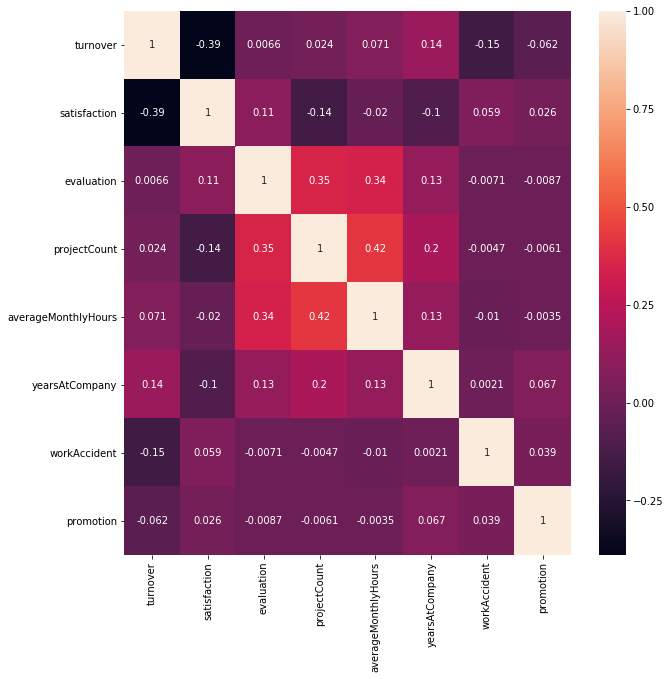

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

#### Positively Correlated Features:

projectCount vs evaluation: 0.35

projectCount vs averageMonthlyHours: 0.42

averageMonthlyHours vs evaluation: 0.34

#### Negatively Correlated Feature:

satisfaction vs turnover: -0.39

#### Summary:

From the heatmap, there is a positive(+) correlation between projectCount, averageMonthlyHours, and evaluation. Which could mean that the employees who spent more hours and did more projects were evaluated highly.

For the negative(-) relationships, turnover and satisfaction are highly correlated. So, we are assuming that people tend to leave a company more when they are less satisfied.

#### Statistical Test for Correlation

In [13]:
# Let's compare the means of our employee turnover satisfaction versus employee population satisfaction
emp_population = df['satisfaction'][df['turnover'] == 0].mean()
emp_turnover_satisfaction = df[df['turnover']==1]['satisfaction'].mean()

print( 'The mean satisfaction for the employee population with no turnover is: ' + str(emp_population))
print( 'The mean satisfaction for employees that had a turnover is: ' + str(emp_turnover_satisfaction) )

The mean satisfaction for the employee population with no turnover is: 0.666809590479516
The mean satisfaction for employees that had a turnover is: 0.44009801176140917


#### Conducting the T-Test and calculating p value 

Let's conduct a t-test at 95% confidence level and see if it correctly rejects the null hypothesis that the sample comes from the same distribution as the employee population. To conduct a one sample t-test, we can use the stats.ttest_1samp() function:

In [14]:
import scipy.stats as stats
stats.ttest_1samp(a=  df[df['turnover']==1]['satisfaction'], # Sample of Employee satisfaction who had a Turnover
                  popmean = emp_population)  # Employee Who Had No Turnover satisfaction mean

Ttest_1sampResult(statistic=-51.3303486754725, pvalue=0.0)

#### T-Test Result

The test result shows the test statistic "t" is equal to -51.33. This test statistic tells us how much the sample mean deviates from the null hypothesis. If the t-statistic lies outside the quantiles of the t-distribution corresponding to our confidence level and degrees of freedom, we reject the null hypothesis. We can check the quantiles with stats.t.ppf():

#### T-Test Quantile

If the t-statistic value we calculated above (-51.33) is outside the quantiles, then we can reject the null hypothesis


In [15]:
degree_freedom = len(df[df['turnover']==1])

LQ = stats.t.ppf(0.025,degree_freedom)  # Left Quartile

RQ = stats.t.ppf(0.975,degree_freedom)  # Right Quartile

print ('The t-distribution left quartile range is: ' + str(LQ))
print ('The t-distribution right quartile range is: ' + str(RQ))

The t-distribution left quartile range is: -1.9606285216
The t-distribution right quartile range is: 1.9606285216


One-Sample T-Test Summary

T-Test = -51.33 | P-Value = 0.000 | Reject Null Hypothesis

Reject the null hypothesis because:

T-Test score is outside the quantiles.
P-value is lower than confidence level of 5%.

Based on the statistical analysis, there seems to be some significant difference between the mean satisfaction of employees who had a turnover and the entire employee population. The super low P-value of 0.00 at a 5% confidence level is a good indicator to reject the null hypothesis.

Note: This does not neccessarily mean that there is practical significance. We would have to conduct more experiments or maybe collect more data about the employees in order to come up with a more accurate finding.

## Exploratory Data Analysis

Text(0,0.5,'Employee Count')

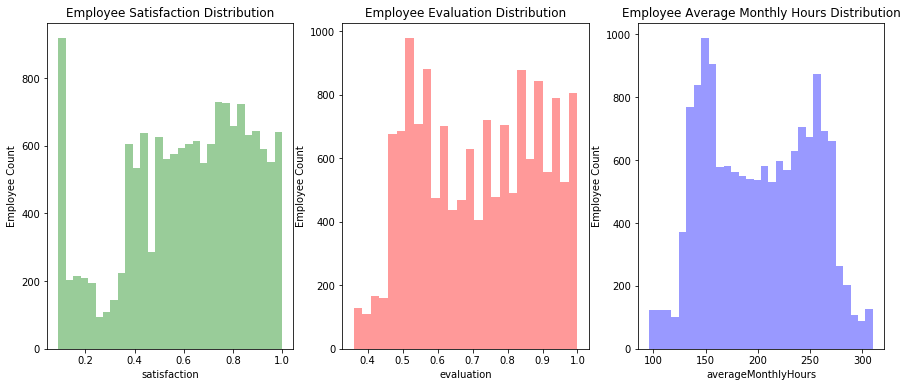

In [16]:
# Using matplotlib for visualization
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Employee Satisfaction
sns.distplot(df.satisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

# Employee Evaluation
sns.distplot(df.evaluation, kde=False, color="r", ax=axes[1]).set_title('Employee Evaluation Distribution')
axes[1].set_ylabel('Employee Count')

# Employee Average Monthly Hours
sns.distplot(df.averageMonthlyHours, kde=False, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
axes[2].set_ylabel('Employee Count')

#### Summary: 

Satisfaction - There is a huge spike for employees with low satisfaction and high satisfaction.

Evaluation - There is a bimodal distrubtion of employees for low evaluations (less than 0.6) and high evaluations (more than 0.8)

AverageMonthlyHours - There is another bimodal distribution of employees with lower and higher average monthly hours (less than 150 hours & more than 250 hours)
Employees with lower average monthly hours were evaluated less and vice versa.

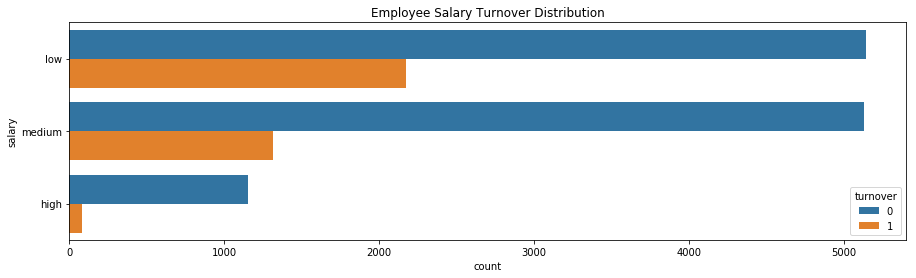

In [17]:
# Salary V.S. Turnover

f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='turnover', data=df).set_title('Employee Salary Turnover Distribution');

#### Summary:

Majority of employees who left either had low or medium salary.

Barely any employees left with high salary.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

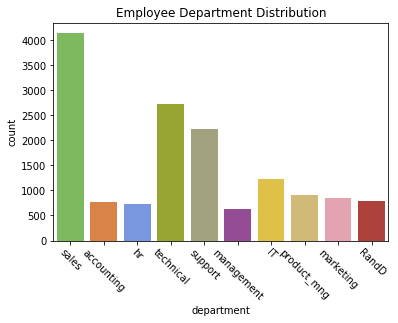

In [18]:
#Department V.S. Turnover
# Types of colors
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

# Count Plot
sns.countplot(x='department', data=df, palette=color_types).set_title('Employee Department Distribution');
plt.xticks(rotation=-45)

#### Summary:

The sales, technical, and support department were the top 3 departments to have employee turnover.

The management department had the smallest amount of turnover.

[Text(0,0.5,'Percent')]

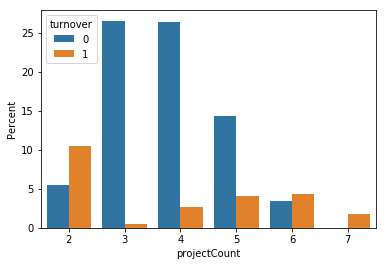

In [19]:
# Turnover V.S. ProjectCount
ax = sns.barplot(x="projectCount", y="projectCount", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

#### Summary:

More than half of the employees with 2, 6, and 7 projects left the company.

Majority of the employees who did not leave the company had 3, 4, and 5 projects.

All of the employees with 7 projects left the company. 

There is an increase in employee turnover rate as project count increases.

Text(0.5,1,'Employee Evaluation Distribution - Turnover V.S. No Turnover')

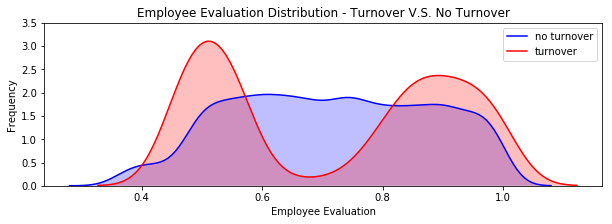

In [20]:
#Turnover V.S. Evaluation
# Kernel Density Plot
fig = plt.figure(figsize=(10,3),)
plt.ylim([0.0,3.5]) 
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'evaluation'] , color='b',shade=True,label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'evaluation'] , color='r',shade=True, label='turnover')
ax.set(xlabel='Employee Evaluation', ylabel='Frequency')
plt.title('Employee Evaluation Distribution - Turnover V.S. No Turnover')

###### Summary:

There is a bimodal distribution for those that had a turnover.

Employees with low performance and high performance tend to leave the company.

The sweet spot for employees that stayed is within 0.6-0.8 evaluation.

Text(0.5,1,'Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

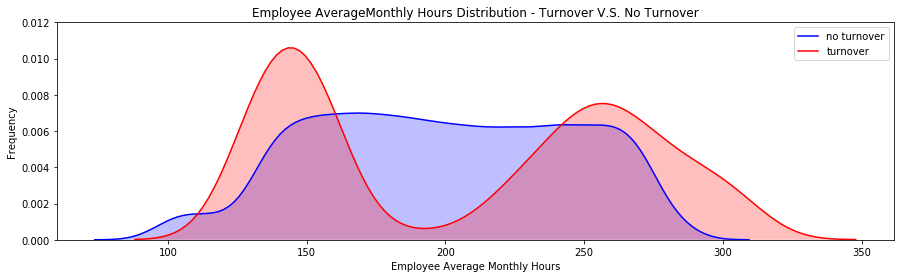

In [21]:
# Turnover V.S. AverageMonthlyHours
fig = plt.figure(figsize=(15,4))
plt.ylim([0.000,0.012]) 
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'averageMonthlyHours'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'averageMonthlyHours'] , color='r',shade=True, label='turnover')
ax.set(xlabel='Employee Average Monthly Hours', ylabel='Frequency')
plt.title('Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

#### Summary:

There is a bimodal distribution for employees that had a turnover.

Employees who had less hours of work (~150hours or less) and too many hours of work (~250 or more) left the company.

Text(0.5,1,'Employee Satisfaction Distribution - Turnover V.S. No Turnover')

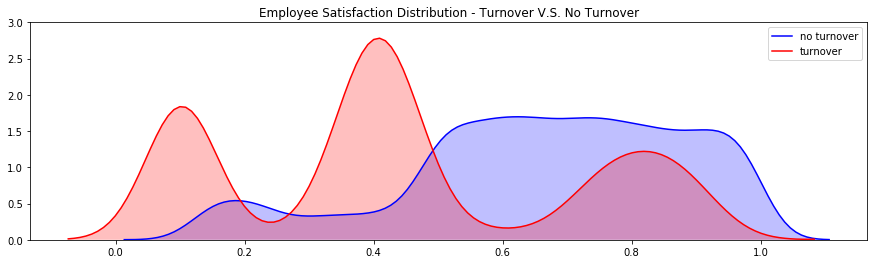

In [22]:
#Turnover V.S. Satisfaction
fig = plt.figure(figsize=(15,4))
plt.ylim([0.0,3]) 
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'satisfaction'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'satisfaction'] , color='r',shade=True, label='turnover')
plt.title('Employee Satisfaction Distribution - Turnover V.S. No Turnover')

#### Summary:

There is a tri-modal distribution for employees that had a turnover.

Employees with satisfaction levels (0.2 or less) or in between (0.3-0.5) or 0.7 and more left the company.

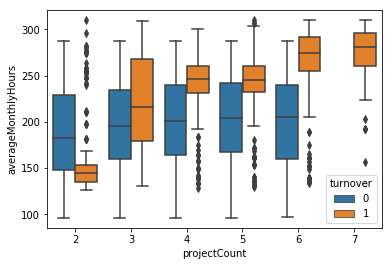

In [23]:
#ProjectCount VS AverageMonthlyHours

import seaborn as sns
sns.boxplot(x="projectCount", y="averageMonthlyHours", hue="turnover", data=df)

#### Summary:

As project count increased, so did average monthly hours

Something weird about the boxplot graph is the difference in averageMonthlyHours between people who had a turnver and did not.

Looks like employees who did not have a turnover had consistent averageMonthlyHours, despite the increase in projects

In contrast, employees who did have a turnover had an increase in averageMonthlyHours with the increase in projects

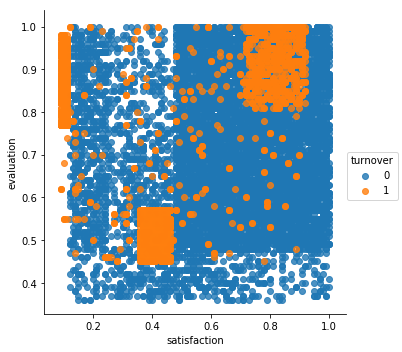

In [24]:
# Satisfaction VS Evaluation
sns.lmplot(x='satisfaction', y='evaluation', data=df, fit_reg=False, hue='turnover')  

#### Summary:

There are 3 distinct clusters for employees who left the company:

Cluster 1 (Hard-working and Sad Employee): Satisfaction was below 0.2 and evaluations were greater than 0.75. Which could be a good indication that employees who left the company were good workers but felt horrible at their job.

Cluster 2 (Bad and Sad Employee): Satisfaction between about 0.35~0.45 and evaluations below ~0.58. This could be seen as employees who were badly evaluated and felt bad at work.

Cluster 3 (Hard-working and Happy Employee): Satisfaction between 0.7~1.0 and evaluations were greater than 0.8. Which could mean that employees in this cluster were "ideal". They loved their work and were evaluated highly for their performance.

[Text(0,0.5,'Percent')]

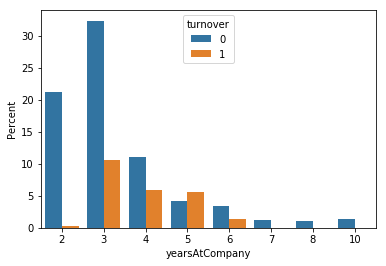

In [25]:
#Turnover V.S. YearsAtCompany
ax = sns.barplot(x="yearsAtCompany", y="yearsAtCompany", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

#### Summary:

More than half of the employees with 4 and 5 years left the company.

## Modeling the Data

#### K-Means Clustering of Employee Turnover

Cluster 1 (Blue): Hard-working and Sad Employees

Cluster 2 (Red): Bad and Sad Employee

Cluster 3 (Green): Hard-working and Happy Employee

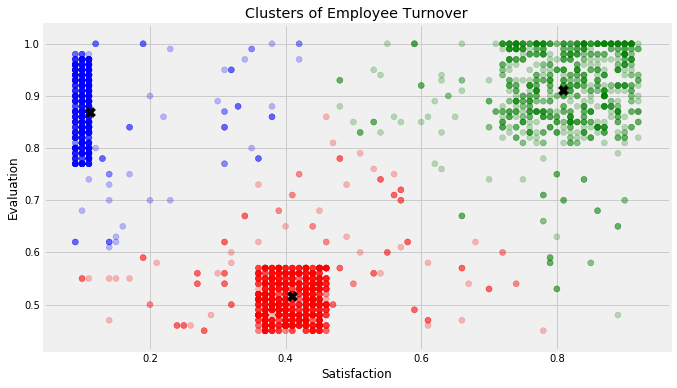

In [40]:
# Import KMeans Model
from sklearn.cluster import KMeans

# Graph and create 3 clusters of Employee Turnover
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(df[df.turnover==1][["satisfaction","evaluation"]])

kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="satisfaction",y="evaluation", data=df[df.turnover==1],
            alpha=0.25,color = kmeans_colors)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")
plt.show()

In [42]:
print(kmeans.predict(X_test))

ValueError: Incorrect number of features. Got 10 features, expected 2

#### Feature Selection

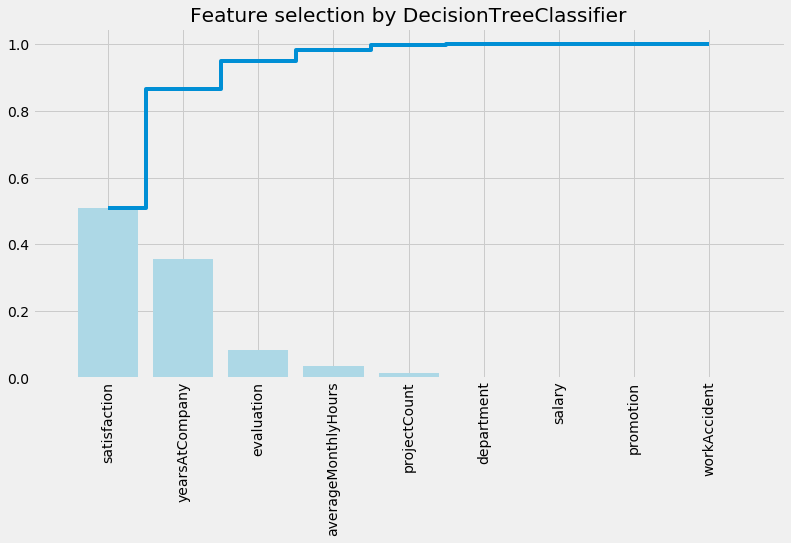

In [27]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

df = pd.DataFrame.from_csv('C:/Users/anuka/Documents/ALT/HR_Analytics.csv', index_col=None)


# Renaming certain columns for better readability
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

# Convert these variables into categorical variables
df["department"] = df["department"].astype('category').cat.codes
df["salary"] = df["salary"].astype('category').cat.codes

# Create train and test splits
target_name = 'turnover'
X = df.drop('turnover', axis=1)

y=df[target_name]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

dtree = tree.DecisionTreeClassifier(class_weight="balanced", min_weight_fraction_leaf=0.01)
dtree = dtree.fit(X_train,y_train)

importances = dtree.feature_importances_
feat_names = df.drop(['turnover'],axis=1).columns

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature selection by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()


#### Summary:

By using a decision tree classifier, it could rank the features used for the prediction. The top three features were employee satisfaction, yearsAtCompany, and evaluation. This is helpful in creating our model for logistic regression because it’ll be more interpretable to understand what goes into our model when we utilize less features.

Top 3 Features: Satisfaction, YearsAtCompany, Evaluation

#### Logistic Regression Analysis

Logistic Regression commonly deals with the issue of how likely an observation belongs to each group. This model is commonly used to predict the likelihood of an event occurring. The output of logistic regression is transformed with a logit function. This makes the output either 0 or 1. 

In [28]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline
#Read the analytics csv file and store our dataset into a dataframe called "df"
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler
df = pd.DataFrame.from_csv('C:/Users/anuka/Documents/ALT/HR_Analytics.csv', index_col=None)

# Renaming certain columns for better readability
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

# Convert these variables into categorical variables
df["department"] = df["department"].astype('category').cat.codes
df["salary"] = df["salary"].astype('category').cat.codes


# Move the reponse variable "turnover" to the front of the table
front = df['turnover']
df.drop(labels=['turnover'], axis=1,inplace = True)
df.insert(0, 'turnover', front)

# Create an intercept term for the logistic regression equation
df['int'] = 1
indep_var = ['satisfaction', 'evaluation', 'yearsAtCompany', 'int', 'turnover']
df1 = df[indep_var]

# Create train and test splits
target_name = 'turnover'
X = df.drop('turnover', axis=1)

y=df[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

X_train.head()


,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary,int
9003,0.59,1.00,4,275,3,0,0,1,2,1
5697,0.81,0.98,6,196,2,0,0,8,1,1
10691,1.00,0.93,5,231,2,0,0,5,2,1
1884,0.87,0.91,5,228,5,0,0,8,1,1
13572,0.87,0.48,5,242,3,0,0,7,2,1


#### Using Logistic Regression Coefficients

In [29]:
import statsmodels.api as sm
iv = ['satisfaction','evaluation','yearsAtCompany', 'int']
logReg = sm.Logit(y_train, X_train[iv])
answer = logReg.fit()

answer.summary
answer.params

C:\Users\anuka\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.467233
         Iterations 6


satisfaction     -3.769022
evaluation        0.207596
yearsAtCompany    0.170145
int               0.181896
dtype: float64

With the elimination of the other variables, we will be using the three most important features to create our model: Satisfaction, Evaluation, and YearsAtCompany.

Following overall equation was developed:

Employee Turnover Score = Satisfaction(-3.769022) + Evaluation(0.207596) + YearsAtCompany*(0.170145) + 0.181896

The constant 0.181896 represents the effect of all uncontrollable variables.

#### Explanation of Coefficients

In [30]:
# Create function to compute coefficients
coef = answer.params
def y (coef, Satisfaction, Evaluation, YearsAtCompany) : 
    return coef[3] + coef[0]*Satisfaction + coef[1]*Evaluation + coef[2]*YearsAtCompany

import numpy as np

# Eg: An Employee with 0.7 Satisfaction and 0.8 Evaluation and worked 3 years has a 14% chance of turnover
y1 = y(coef, 0.7, 0.8, 3)
p = np.exp(y1) / (1+np.exp(y1))
p

0.14431462559738251

Employee Turnover Score = Satisfaction(-3.769022) + Evaluation(0.207596) + YearsAtCompany*(0.170145) + 0.181896

                      = (0.7)(-3.769022) + (0.8)(0.207596) + (3)(0.170145) + 0.181896 = 0.14431 = 14%

The values above are the coefficient assigned to each independent variable. The constant 0.181896 represents the effect of all uncontrollable variables.

Result: This employee would have a 14% chance of leaving the company.

#### Note: 
Accuracy alone does not measure an important concept that needs to be taken into consideration in this type of evaluation. 
Hence, we will also be calculating False Positive and False Negative errors.

False Positives (Type I Error): You predict that the employee will leave, but will not.

False Negatives (Type II Error): You predict that the employee will not leave, but will leave.

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler

In [32]:
# Create train and test splits
target_name = 'turnover'
X = df.drop('turnover', axis=1)
y=df[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

In [33]:
# Check accuracy of Logistic Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=1)

model.fit(X_train, y_train)
print ("Logistic accuracy is %2.2f" % accuracy_score(y_test, model.predict(X_test)))

Logistic accuracy is 0.76


In [34]:
# Using 10 fold Cross-Validation to train our Logistic Regression Model
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression(class_weight = "balanced")
scoring = 'roc_auc'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.818 (0.011)


#### Logistic Regression V.S. Random Forest V.S. Decision Tree

In [35]:
# Compare the Logistic Regression Model V.S. Random Forest Model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier



# NOTE: By adding in "class_weight = balanced", the Logistic Auc increased by about 10%! This adjusts the threshold value
logis = LogisticRegression(class_weight = "balanced")
logis.fit(X_train, y_train)
print ("\n\n ---Logistic Model---")
logit_roc_auc = roc_auc_score(y_test, logis.predict(X_test))
print ("Logistic AUC = %2.2f" % logit_roc_auc)
print(classification_report(y_test, logis.predict(X_test)))
model.fit(X_train, y_train)
print ("Logistic accuracy is %2.2f" % accuracy_score(y_test, logis.predict(X_test)))

# Decision Tree Model
dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)
print ("\n\n ---Decision Tree Model---")
dt_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
print ("Decision Tree AUC = %2.2f" % dt_roc_auc)
print(classification_report(y_test, dtree.predict(X_test)))
print("Decision Tree accuracy is %2.2f" % accuracy_score(y_test, dtree.predict(X_test)))

# Random Forest Model
rf = RandomForestClassifier(
    n_estimators=1000, 
    max_depth=None, 
    min_samples_split=10, 
    class_weight="balanced"
    #min_weight_fraction_leaf=0.02 
    )
rf.fit(X_train, y_train)
print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))
print("Random Forest accuracy is %2.2f" % accuracy_score(y_test, rf.predict(X_test)))



 ---Logistic Model---
Logistic AUC = 0.76
             precision    recall  f1-score   support

          0       0.91      0.74      0.82      1714
          1       0.48      0.77      0.60       536

avg / total       0.81      0.75      0.77      2250

Logistic accuracy is 0.75


 ---Decision Tree Model---
Decision Tree AUC = 0.94
             precision    recall  f1-score   support

          0       0.97      0.97      0.97      1714
          1       0.92      0.91      0.92       536

avg / total       0.96      0.96      0.96      2250

Decision Tree accuracy is 0.96


 ---Random Forest Model---
Random Forest AUC = 0.98
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      1714
          1       0.99      0.96      0.98       536

avg / total       0.99      0.99      0.99      2250

Random Forest accuracy is 0.99


The best model performance out of the three (Decision Tree Model, Logistic Regression Model, Random Forest Model) is Random Forest.

#### ROC Graph

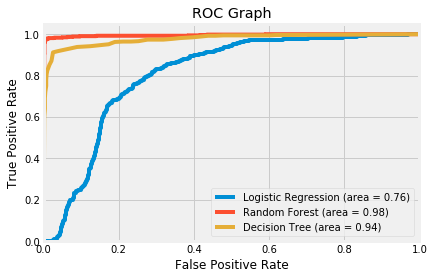

In [36]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logis.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])


plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

## Conclusion

Employees generally left when they are underworked (less than 150hr/month or 6hr/day) or overworked (more than 250hr/month or 10hr/day)

Employees with either really high or low evaluations should be taken into consideration for high turnover rate

Employees with low to medium salaries are the bulk of employee turnover

Employees that had 2, 6, or 7 project count was at risk of leaving the company

Employee satisfaction is the highest indicator for employee turnover.

Employee that had 4 and 5 yearsAtCompany should be taken into consideration for high turnover rate

Employee satisfaction, yearsAtCompany, and evaluation were the three biggest factors in determining turnover.

In [37]:
model.fit(X_train, y_train)
print ("Logistic accuracy is %2.2f" % accuracy_score(y_test, model.predict(X_test)))

Logistic accuracy is 0.76
